In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [3]:
train = pd.read_excel('new_data.xlsx')
print(train)

                     Date    Open    High     Low   Close    Volume
0     2015-01-04 16:00:00   40.60   40.76   40.31   40.72  36865322
1     2015-02-04 16:00:00   40.66   40.74   40.12   40.29  37487476
2     2015-06-04 16:00:00   40.34   41.78   40.18   41.55  39223692
3     2015-07-04 16:00:00   41.61   41.91   41.31   41.53  28809375
4     2015-08-04 16:00:00   41.48   41.69   41.04   41.42  24753438
...                   ...     ...     ...     ...     ...       ...
1506   3/25/2021 16:00:00  235.30  236.94  231.57  232.34  34061853
1507   3/26/2021 16:00:00  231.55  236.71  231.55  236.48  25479853
1508   3/29/2021 16:00:00  236.59  236.80  231.88  235.24  25227455
1509   3/30/2021 16:00:00  233.53  233.85  231.10  231.85  24792012
1510   3/31/2021 16:00:00  232.91  239.10  232.39  235.77  43623471

[1511 rows x 6 columns]


## train-> "OPEN"

<Axes: >

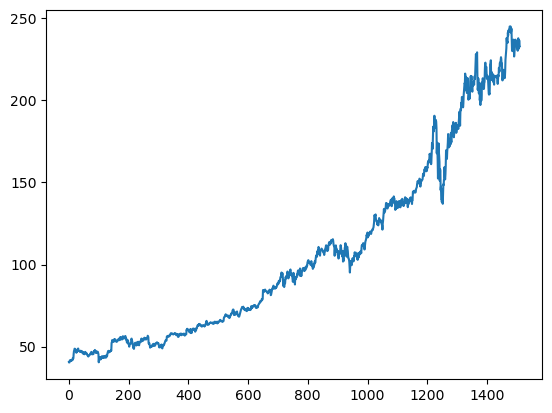

In [4]:
#step 1
#normal data
train['Open'].plot()

(array([422., 228., 180., 191., 135.,  74.,  58.,  48., 119.,  56.]),
 array([ 40.34 ,  60.809,  81.278, 101.747, 122.216, 142.685, 163.154,
        183.623, 204.092, 224.561, 245.03 ]),
 <BarContainer object of 10 artists>)

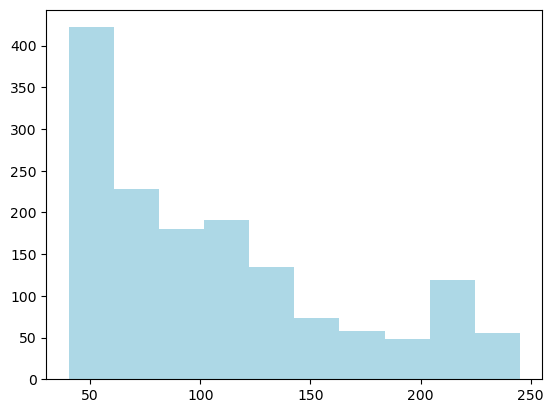

In [5]:
plt.hist(train['Open'], color='lightblue')

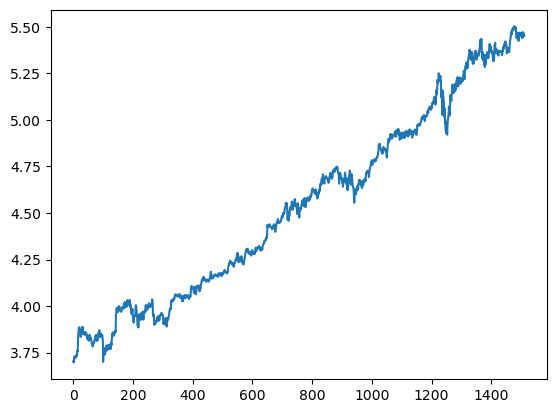

In [6]:
#step 2 log transform
x= np.log(train['Open'])
plt.plot(x)

# train -> 'High'

<Axes: >

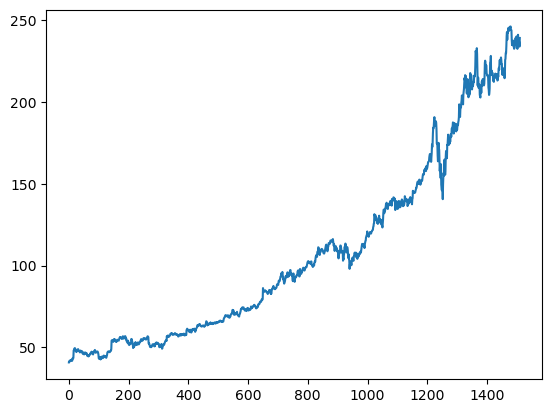

In [7]:
train['High'].plot()

(array([424., 226., 176., 193., 134.,  76.,  53.,  50., 118.,  61.]),
 array([ 40.74 ,  61.279,  81.818, 102.357, 122.896, 143.435, 163.974,
        184.513, 205.052, 225.591, 246.13 ]),
 <BarContainer object of 10 artists>)

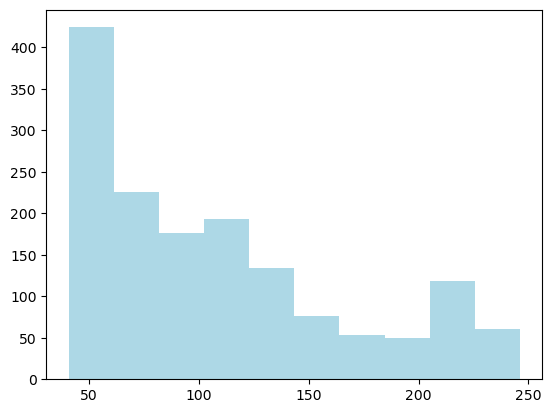

In [8]:
plt.hist(train['High'], color='lightblue')

In [9]:
#AD fuller test
#train=train.dropna()
t = train["High"].values
result = adfuller(t)
result
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 1.570419
p-value: 0.997766


ADF Statistic: -0.088150
p-value: 0.950606


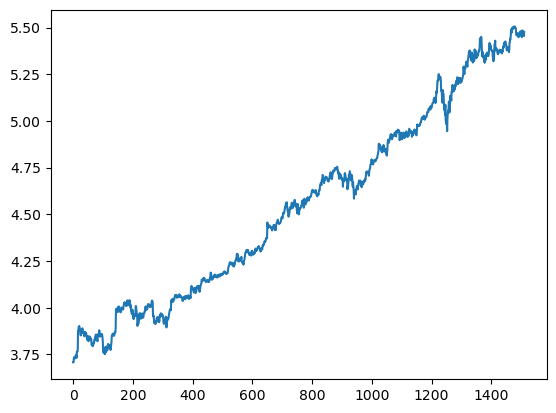

In [10]:
#step 2 log transform
x= np.log(train['High'])
plt.plot(x)
result = adfuller(x)
result
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -9.976424
p-value: 0.000000


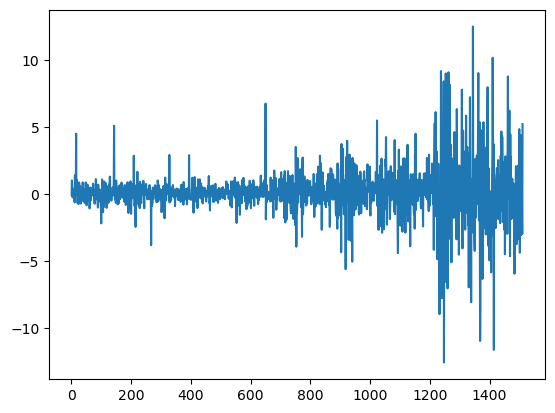

In [11]:
#1st order transformation

train['High_diff']= train['High']-train['High'].shift(1)
train['High_diff'].plot()
result = adfuller(train['High_diff'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -17.335412
p-value: 0.000000


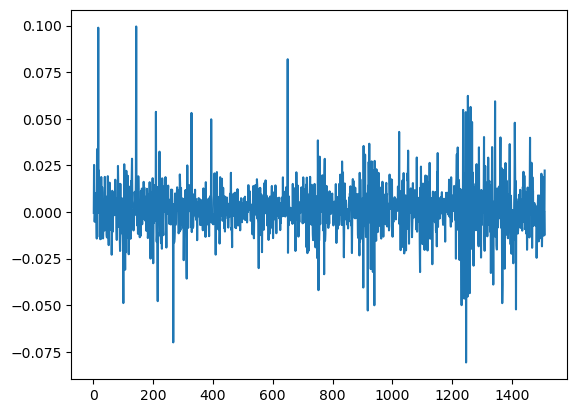

In [12]:
#Power Transformation
train['High_log'] = np.log(train['High'])
train['High_log_diff'] = train['High_log'] - train['High_log'].shift(1)
train['High_log_diff'].plot()
result = adfuller(train['High_log_diff'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# train -> 'Low'

<Axes: >

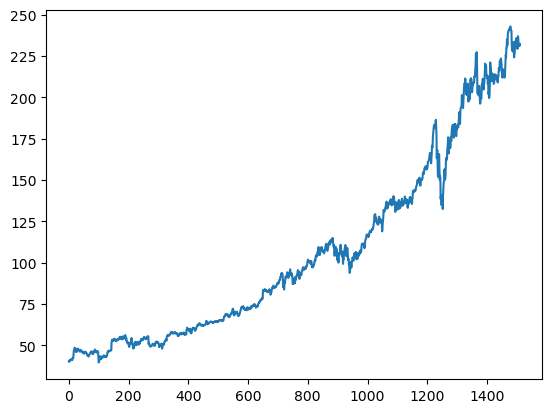

In [13]:
train['Low'].plot()

(array([415., 235., 178., 193., 140.,  69.,  56.,  57., 114.,  54.]),
 array([ 39.72,  60.04,  80.36, 100.68, 121.  , 141.32, 161.64, 181.96,
        202.28, 222.6 , 242.92]),
 <BarContainer object of 10 artists>)

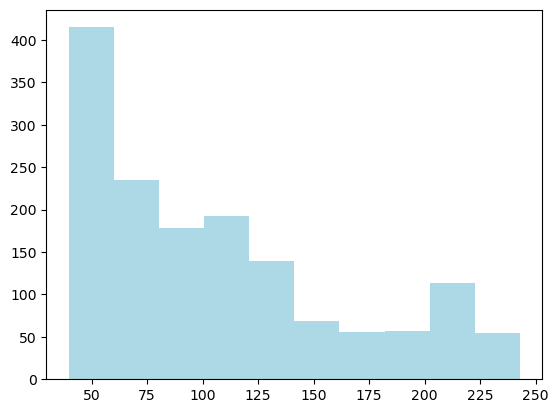

In [14]:
plt.hist(train['Low'], color='lightblue')

In [15]:
#AD fuller test
#train=train.dropna()
t = train["Low"].values
result = adfuller(t)
result
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 1.224828
p-value: 0.996153


ADF Statistic: -0.151713
p-value: 0.944038


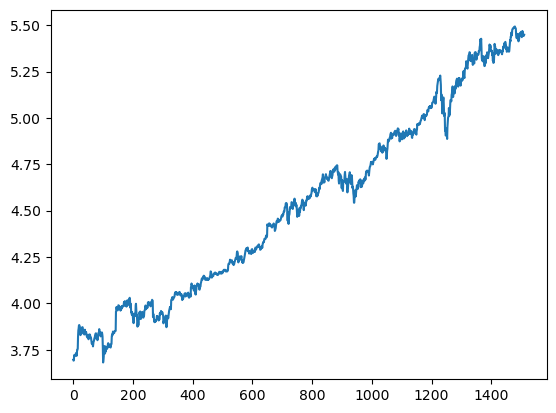

In [16]:
#step 2 log transform
x= np.log(train['Low'])
plt.plot(x)
result = adfuller(x)
result
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -11.808717
p-value: 0.000000


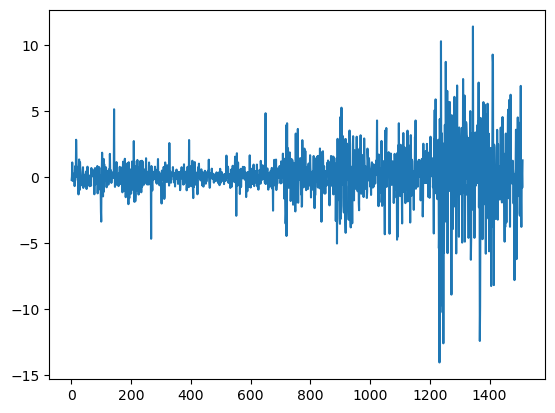

In [17]:
#1st order transformation

train['Low_diff']= train['Low']-train['Low'].shift(1)
train['Low_diff'].plot()
result = adfuller(train['Low_diff'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# train -> 'Close'

<Axes: >

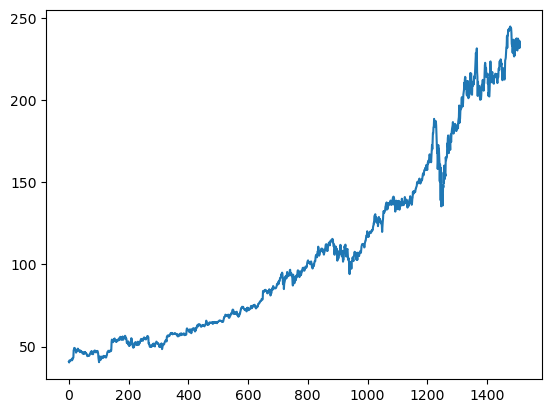

In [19]:
#step 1
#normal data
train['Close'].plot()

(array([421., 230., 178., 191., 137.,  72.,  57.,  54., 116.,  55.]),
 array([ 40.29,  60.76,  81.23, 101.7 , 122.17, 142.64, 163.11, 183.58,
        204.05, 224.52, 244.99]),
 <BarContainer object of 10 artists>)

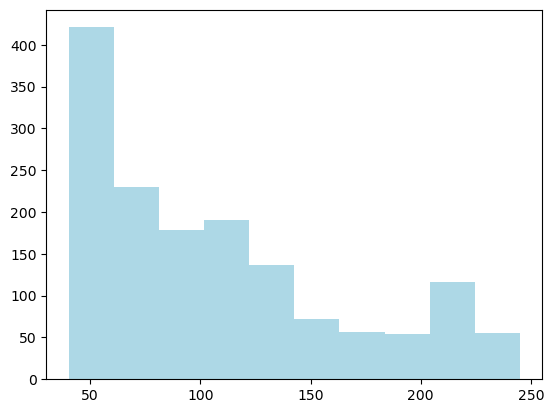

In [20]:
plt.hist(train['Close'], color='lightblue')


In [22]:
#AD fuller test
#train=train.dropna()
t = train["Close"].values
result = adfuller(t)
result
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 1.737136
p-value: 0.998216


ADF Statistic: -0.128967
p-value: 0.946476


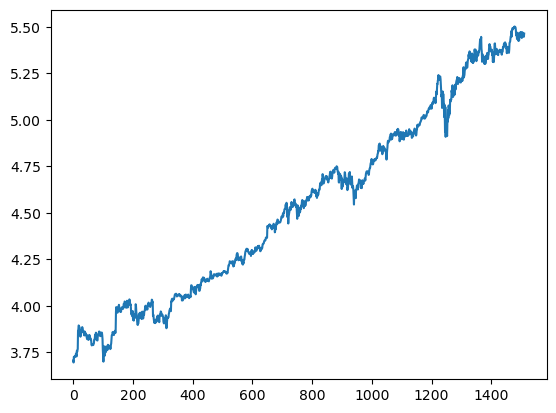

In [23]:
#step 2 log transform
x= np.log(train['Close'])
plt.plot(x)
result = adfuller(x)
result
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

<Axes: >

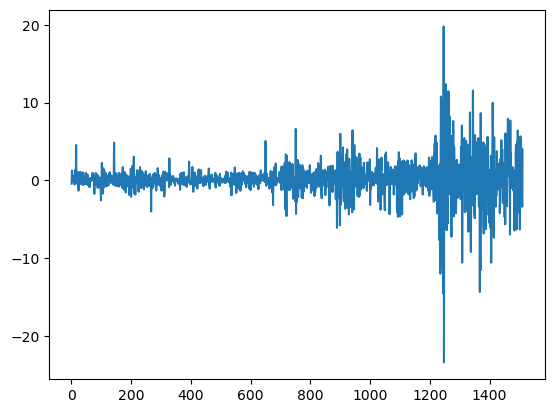

In [25]:
#1st order transformation

train['Close_diff']= train['Close']-train['Close'].shift(1)
train['Close_diff'].plot()

In [26]:
result = adfuller(train['Close_diff'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -10.038331
p-value: 0.000000


ADF Statistic: -30.939979
p-value: 0.000000


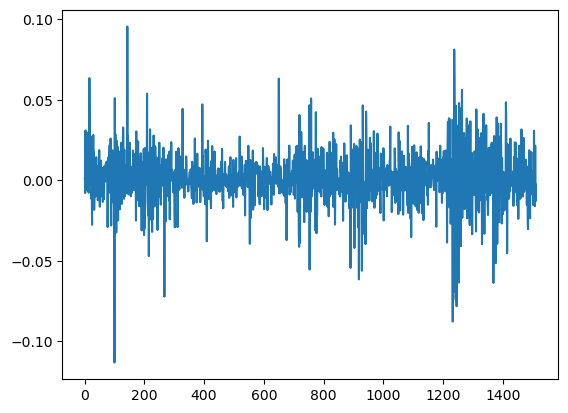

In [27]:
#Power Transformation
train['Close_log'] = np.log(train['Close'])
train['Open_log_diff'] = train['Close_log'] - train['Open_log'].shift(1)
train['Open_log_diff'].plot()
result = adfuller(train['Open_log_diff'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])